In [78]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [79]:
import numpy as np
#from chainconsumer import ChainConsumer
from corner import corner

In [2]:
! ls -lt /scratch/users/swmclau2/PearceMCMC/*.hdf5

-rw-r--r-- 1 swmclau2 kipac 45167393 Jan  9 15:43 /scratch/users/swmclau2/PearceMCMC/test_mcmc.hdf5


In [81]:
#fname = '/scratch/users/swmclau2/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat.npy'
fname = '/scratch/users/swmclau2/PearceMCMC/test_mcmc.hdf5'

In [82]:
n_walkers = 500
n_burn = 15000

In [83]:
from itertools import islice

In [84]:
chain_list = []
with open(fname, 'r') as f:
    step_counter = 0
    header =  f.readline() #header
    chain_pnames = header[1:].split()
    while True:
        next_lines = islice(f, n_walkers)
        step_counter+=1
        
        #if step_counter % 1000 == 0:
        #    print step_counter, len(chain_list)
        
        if step_counter <= n_burn:
            for line in next_lines:
                pass
            continue

        next_lines = np.array([ np.fromstring(line, sep = ' ') for line in next_lines], dtype=float)

        if len(next_lines) < 1:
            break
            
       
            
        chain_list.append(next_lines)

In [85]:
chain = np.vstack(chain_list)

In [86]:
print chain.shape, chain.shape[0]/n_walkers

(2500000, 11) 5000


In [87]:
n_params = chain.shape[1] if len(chain.shape) > 1 else 1

In [88]:
MAP = chain.mean(axis = 0)
print MAP

[  3.88518001e+00   1.33570595e+01   1.89151153e-01   6.79431250e+01
  -8.77007689e-01   3.09690587e+00   1.13323756e-01   1.36514290e+01
   9.60685886e-01   9.72749299e-01   2.24917492e-02]


In [89]:
param_names = [r'$N_{eff}$', r'$\log(M_0)$',r'$\log(M_1)$', r'$H_0$',r'$w_0$', r'$\ln(10A_s)$',  r'$\Omega_c h^2$',
               r'$\sigma_{\log M }$', r'$\alpha$',  r'$n_s$', r'$\Omega_b h^2$']

In [90]:
hod_idxs = np.array([1, 2, 7, 8])
cosmo_idxs = np.array([0, 3, 4, 5, 6, 9, 10])

In [91]:
if chain.shape[1] == 7:
    cosmo_chain = chain
else:
    hod_chain = chain[:, hod_idxs]
    cosmo_chain = chain[:, cosmo_idxs]

In [92]:
chain_pnames

['Neff',
 'logM0',
 'sigma_logM',
 'H0',
 'w0',
 'ln10As',
 'omch2',
 'logM1',
 'alpha',
 'ns',
 'ombh2']

In [93]:
hod_param_names = [r'$\log(M_0)$',r'$\sigma_{\log M }$',r'$\log(M_1)$' ,r'$\alpha$' ]
cosmo_param_names = [r'$N_{eff}$', r'$H_0$', r'$w_0$', r'$\Omega_c h^2$', r'$\ln(10A_s)$' ,r'$n_s$',r'$\Omega_b h^2$' ]

In [94]:
from pearce.mocks import cat_dict
cosmo_params = {'simname':'testbox', 'boxno': 0, 'realization':1, 'scale_factors':[1.0], 'system': 'sherlock'}
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [95]:
cpv = cat._get_cosmo_param_names_vals()

cat_val_dict =  {key: val for key, val in zip(cpv[0], cpv[1])}

In [96]:
#cosmo_true_vals = [3.7,70.7317,-1.13151,0.12283, 3.11395,  0.953515,  0.021762]
cosmo_true_vals = [cat_val_dict[pn] for pn in chain_pnames if pn in cat_val_dict]

In [97]:
print cosmo_true_vals

[2.9500000000000002, 63.231699999999996, -0.72651299999999996, 3.0389499999999998, 0.10783, 0.98051499999999991, 0.023262900000000003]


In [98]:
emulation_point = [('logM0', 13.5), ('sigma_logM', 0.25),
                    ('alpha', 0.9),('logM1', 13.5)]

In [99]:
hod_true_vals = [13.5, 0.25,13.5, 0.9]

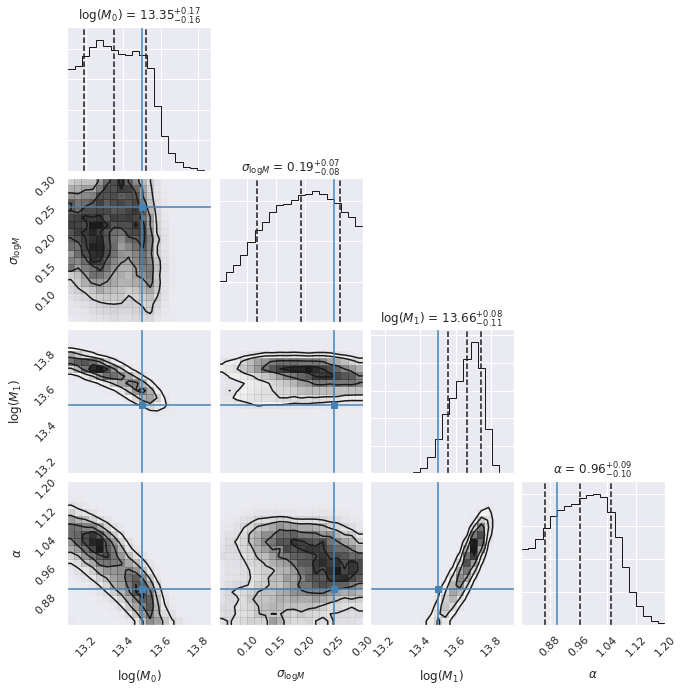

In [100]:
corner(hod_chain, labels=hod_param_names,
                       quantiles=[0.16, 0.5, 0.84],
                        truths = hod_true_vals,
                       show_titles=True, title_kwargs={"fontsize": 12},
                      plot_datapoints =False, plot_density = True);

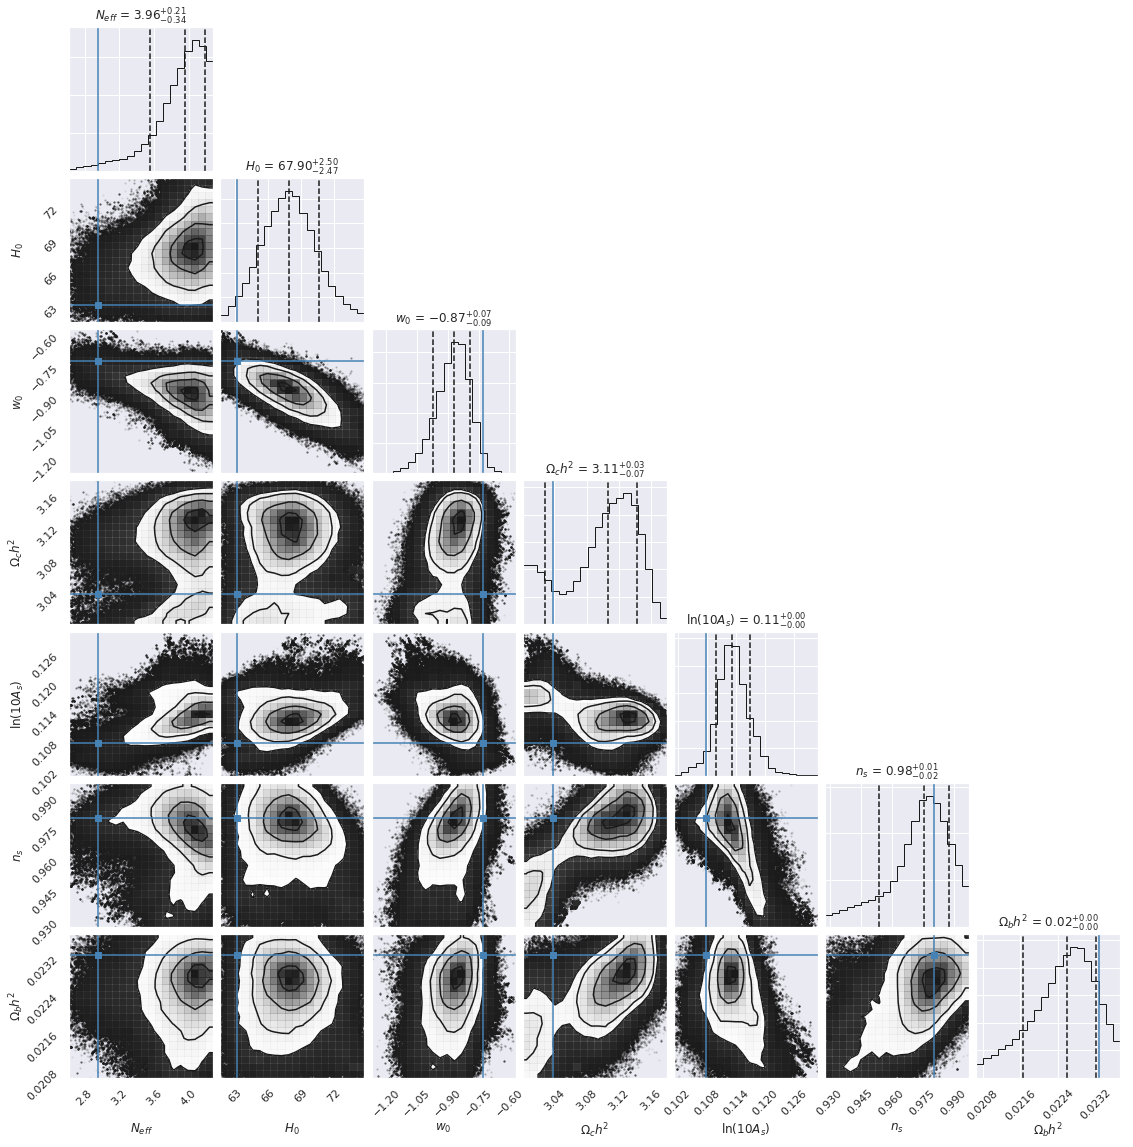

In [101]:
corner(cosmo_chain, labels=cosmo_param_names,
                       quantiles=[0.13, 0.5, 0.86],
                        truths = cosmo_true_vals,
                       show_titles=True, title_kwargs={"fontsize": 12},
                          plot_datapoints = True, plot_density = True);